### Modelo de Regresión utilizando Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
sns.set_theme()


#### 1. Obtención, preparación y visualización de datos

Al igual que en ejercicio anterior, nuestro marco de datos viene determinado por una hoja de cálculo. En lugar de utilizar el módulo CSV, vamos a utilizar pd.read_excel ya que el archivo viene con la extensión xlsx. Asignaremos la variable *data* al marco de datos global.

Posteriormente comenzamos la **segregación de datos**, denominando $X$ la columna ['House Size (sq.ft.)'] e $Y$ a la columna ['House Price'], puesto que ***intentamos poner en relación el precio que tendrá la vivienda con respecto al tamaño de la misma***. Es decir, el precio de la casa será nuestra variable dependiente. Una vez más, podemos acceder a una visualización del marco de datos mediante .head(), .tail() o utilizando .info() si buscamos obtener información general.

Finalmente, obtenemos una **visualización general de los datos mediante un scatterplot**. Esto nos permitirá observar gráficamente los datos. En la columna $Y$ aparecerá el precio de la vivienda y en el eje $X$ el tamaño. A diferencia de en el ejercicio anterior, introducimos etiquetas de referencia xlabel e ylabel para marcar los nombres.

Por último, para poner en contexto los datos desde el punto 0, debemos introducir una función plt.axis() que nos permite **personalizar las dimensiones del eje**.

In [2]:
data = pd.read_excel('Housing.xlsx')
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [3]:
X = data['House Size (sq.ft.)']
Y = data['House Price']
X.head()

0    1940
1    1300
2    1420
3    1680
4    1270
Name: House Size (sq.ft.), dtype: int64

In [4]:
Y.head()

0    1116000
1     860000
2     818400
3    1000000
4     640000
Name: House Price, dtype: int64

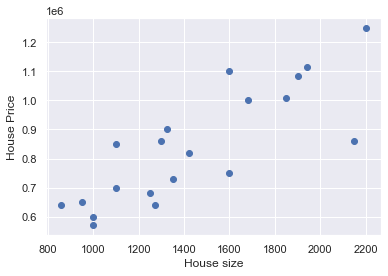

In [5]:
plt.scatter(X,Y)
plt.xlabel('House size')
plt.ylabel('House Price')
plt.show()

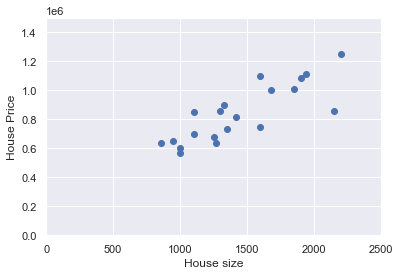

In [6]:
plt.scatter(X,Y) 
plt.axis([0, 2500, 0, 1500000]) 
plt.xlabel("House size") 
plt.ylabel("House Price") 
plt.show()

#### 2. Preparamos la muestra para la regresión

Una vez visualizados los datos, pasamos a preparar el modelo de regresión utilizando Scikit-learn. El primer paso que tenemos que realizar es el de **separar nuestra muestra** en el grupo de entrenamiento (train) y de testeo (test). Para ello utilizaremos el módulo *train_test_split*, donde indicaremos los datos a introducir (X,Y), el tamaño de la muestra que queremos incluir (test_size = 0.2) = 20% de la muestra, *dejando el otro 80% para train* y por último random_state = 0 que nos permite reproducir el mismo modelo.

Finalmente tenemos que ***convertir los datos segmentados en el formato y dimensión adecuada que nos requerirá Scikit-Learn*** para poder implementar la regresión. Para ello utilizamos la función reshape() de numpy para los array.

Por último, si queremos comprobar los parámetros de la segmentación, podemos hacerlo pasando la función len(X_train), para ver la cantidad, type(X_train) para ver el formato o X_train.shape para ver la dimensión del array.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [9]:
X_train= np.array(X_train).reshape(-1,1) 
y_train= np.array(y_train).reshape(-1,1) 
X_test= np.array(X_test).reshape(-1,1) 
y_test= np.array(y_test).reshape(-1,1) 

#### 3. Implementación de la Regresión 

Una vez tenemos los datos preparados, estamos listos para implementar el modelo de regresión de Scikit-Learn. En primer lugar, importaremos la *class* necesaria e ***inicializaremos el objeto LinearRegression()*** al que asignaremos el nombre linregression para poder utilizar los *métodos* de la misma.

Posteriormente, pasaremos los datos sobre los que queremos hacer la regresión mediante el método .fit() aplicado al objeto inicializado que llamamos linregression. El paso siguiente será la obtención de métricas y comprobaciones de precisión.

In [10]:
from sklearn.linear_model import LinearRegression 
linregression = LinearRegression()
linregression.fit(X_train, y_train)

LinearRegression()

#### 4. Obtención y comparación de resultados

Una vez establecemos la regresión, podemos podemos obtener la precisión sobre la predicción de datos para nuestra variable independiente (Precio de la vivienda). Para ello podemos utilizar la función .predict() sobre el marco de datos utilizado para el "entrenamiento" del algoritmo *X_test*. ***Esto nos permitirá comprobar posteriormente si los datos obtenidos están en concordancia con los datos de la muestra y con qué precisión.***

Además, es relativamente sencillo obtener el *intercept* y el *slope* mediante las funciones .intercept_ y .coef_ del objeto LinearRegression() de scikit-learn. ***De este modo podemos obtener la ecuación para nuestra recta de regresión***.

$ Y = \alpha + \beta · x$, donde $\alpha =$ intercept y $\beta =$ slope.

Por útlimo, podemos obtener más métricas sobre el modelo en caso de que lo precisemos para un mayor detalle como $R^2$ mediante linregression.score(), etc.

In [11]:
y_pred = linregression.predict(X_test)
y_pred

array([[634973.36884605],
       [772590.58762453],
       [752930.98494189],
       [890548.20372037]])

In [12]:
linregression.intercept_

array([261440.9178759])

In [13]:
linregression.coef_

array([[393.19205365]])

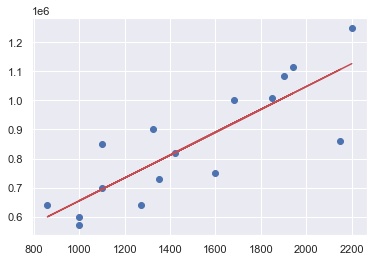

In [14]:
import matplotlib.pyplot as plt 
plt.scatter(X_train, y_train) 
plt.plot(X_train, linregression.predict(X_train), 'r') 
plt.show()

# Comentario


Una vez implementado nuestro modelo, es interesante comprobar, como comentamos anteriormente, la precisión de los datos obtenidos para $Y predict$ por el algoritmo en nuestra muestra conocida en comparación con los datos reales de $Y test$. Dependiendo del estudio, bastará con ver los np.array, generar un dataframe mayor para obtener métricas o visualizar de forma gráfica como en el ejmplo mostrado. 



In [15]:
print(f'Muestra real = {y_test}')
print(f'Predicción = {np.round(y_pred,2)}')

Muestra real = [[ 650000]
 [ 860000]
 [ 680000]
 [1100000]]
Predicción = [[634973.37]
 [772590.59]
 [752930.98]
 [890548.2 ]]


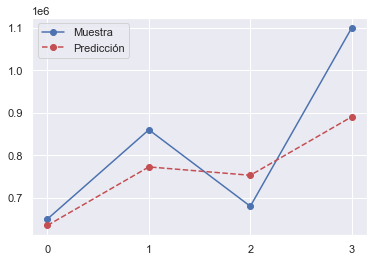

In [16]:
plt.plot(y_test, label='Muestra',marker='o', color = 'b')
plt.plot(y_pred, label='Predicción', marker='o', linestyle='--', color='r')
plt.xticks(list(range(len(y_pred))))

plt.legend()

In [17]:
linregression.score(X_train, y_train) # R^2

0.6980267531453604

### Enfoque utilizando StatsModels

Por último, comentar que podemos implementar el módulo statsmodels para implementar el modelo de regresión obteniendo las siguientes métricas.

In [18]:
import statsmodels.formula.api as smf

formula = "Y ~ X"

modelo = smf.ols(formula, data = data).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           8.13e-06
Time:                        15:19:12   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
X            401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
modelo.params

Intercept    260806.236056
X               401.916286
dtype: float64

### Resultado de los dos modelos

El modelo de **Scikit-Learn** arroja un resultado de $Y = 261440.92 + 393.19x$ con un $R^2 = 0.698$ 

El modelo de **Statsmodels** arroja un resultado de $Y= 260806.23 + 401.92x$ con un $R^2 = 0.678$


Pese a que los modelos explican claramente que existe una relación lineal entre el tamaño y el precio de la vivienda para la muestra seleccionada, ***sería interesante introducir alguna variable más o incrementar la muestra de tal forma que nos ayude a definir con mayor precisión esta relación.*** 

Pasariamos por tanto de un modelo de regresión simple a un modelo de regresión múltiple, en el cual intentaríamos buscar un incremento de métricas tales como $R^2$ o la reducción de $SE(\alpha)$ y $SE(\beta)$ mediante el aumento de la muestra. 